# Examples of non-standard libraries

There are many popular libraries which are not part of the default Python installation. You learned how to find and
install them in the previous unit. Now a few libraries are presented. Note that this unit will not give 
a complete introduction in any of these libraries. Instead the goal of this unit is to give an overview 
of the large variety of available libraries. 


## [requests](https://docs.python-requests.org/en/latest/) - HTTP for Humans

Using the `requests` library, you can connect to web servers and fetch their content.
The [Quickstart Guide](https://docs.python-requests.org/en/latest/user/quickstart/)
contains examples on how to use it and what you can do with it.

In [1]:
import requests

r = requests.get("https://en.wikipedia.org/wiki/Python_(programming_language)")
print(
    f"The word 'Python' is used {r.text.count('Python')} times in its Wikipedia entry!"
)

The word 'Python' is used 1387 times in its Wikipedia entry!


## [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) - Analyzing Webpages

BeautifulSoup is a library which perfectly complements requests, the library just introduced. Whereas requests offers the possibility to download webpages, BeautifulSoup supports the analysis of these webpages. (Actually, the name *BeautifulSoup* goes back to syntactically incorrect webpages containing just a "soup of tags"). 

In the following cell, the web-page from [The Guardian](https://www.theguardian.com) is first downloaded with `request.get()`. The content is then analyzed using `BeautifulSoup()`. With the help of the method `.find_all()` all headings of type `h3` are then listed and printed out.

In [2]:
import requests
from bs4 import BeautifulSoup

r = requests.get("http://www.theguardian.com")
soup = BeautifulSoup(r.text)

for title in soup.find_all("h3"):
    print(title.text)

Live  Russia-Ukraine war: Russia has ‘completely destroyed’ Donbas and turned region into ‘hell’, says Zelenskiy 
Live  Russia-Ukraine war: Russia has ‘completely destroyed’ Donbas and turned region into ‘hell’, says Zelenskiy 
Supply crisis  US accuses Russia of weaponising food and holding global supplies ‘hostage’ 
Supply crisis  US accuses Russia of weaponising food and holding global supplies ‘hostage’ 
Vladimir Putin  Daughter flew to Munich ‘more than 50 times’ in two years, leaks reveal 
Vladimir Putin  Daughter flew to Munich ‘more than 50 times’ in two years, leaks reveal 
At a glance  What we know on day 86 of the invasion 
At a glance  What we know on day 86 of the invasion 
Exclusive   Pete Buttigieg says US backs new Marshall plan to rebuild Ukraine 
‘Now we get hit too’  Belgorod, the Russian city on the Ukraine frontline 
Ukraine  Zelenskiy compares Russian laser threat to nonexistent Nazi ‘wonder weapon’ 
Germany  Gerhard Schröder to be stripped of privileges for not c

## [tkinter](https://docs.python.org/3/library/tkinter.html) - Python interface to Tcl/Tk

With `tkinter` you can create a graphical user interface (*GUI*) to extend your program. The
[documentation](https://tkdocs.com/index.html) offers a detailed description how to start and how to use it. In the
example below, a very basic program is shown to create a window containing a text and a button to close it.

In [3]:
from tkinter import *
 
window = Tk()
window.title("GUI created with tkinter")
window.geometry("400x300")

def function_button_1():
    print("Button was pressed")
    
def function_button_2():
    window.destroy()

btn_1 = Button(window, 
             text="This is a Button", 
             background = "yellow", 
             command = function_button_1)
btn_1.grid(column=0, row=1)

btn_2 = Button(window, 
             text="Quit", 
             background = "red", 
             command = function_button_2)
btn_2.grid(column=1, row=1)
             
window.mainloop()

Button was pressed
Button was pressed


## Working with large data sets

### [Pandas](https://pandas.pydata.org/) - Python Data Analysis Library

The Python module `pandas` can be used to process data sets, which size is only limited by the memory of your computer.
It provides methods and functions to analyze and visualize these data sets. 

In the next cells, you can see some brief basic usage examples how to use `pandas`. The data used in this example
contains angular rate and acceleration measurements from an IMU *(Intertial Measuremnt Unit)* which 
was sampled with 1 kHz (1.000 measurements per second).

With `head(`*`x`*`)` and `tail(`*`x`*`)`, you can return the first/last *x* lines of your data.

In [4]:
import pandas as pd

dataframe = pd.read_csv("gyro_accel.csv", sep=";")

print(dataframe.info())

print(dataframe.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X_GYRO (32 bit)  100000 non-null  float64
 1   Y_GYRO (32 bit)  100000 non-null  float64
 2   Z_GYRO (32 bit)  100000 non-null  float64
 3   X_ACCL (32 bit)  100000 non-null  float64
 4   Y_ACCL (32 bit)  100000 non-null  float64
 5   Z_ACCL (32 bit)  100000 non-null  float64
dtypes: float64(6)
memory usage: 4.6 MB
None
   X_GYRO (32 bit)  Y_GYRO (32 bit)  Z_GYRO (32 bit)  X_ACCL (32 bit)  \
0        -0.153669         0.135971         0.012654        -0.014472   
1        -0.151507        -0.060998         0.032467        -0.012555   

   Y_ACCL (32 bit)  Z_ACCL (32 bit)  
0        -0.008335         1.000984  
1        -0.010355         1.002156  


Or you can just select and print one specific column of your data:

In [5]:
print(dataframe["Z_ACCL (32 bit)"])

0        1.000984
1        1.002156
2        1.003313
3        1.002596
4        1.003230
           ...   
99995    1.003572
99996    1.002047
99997    1.002171
99998    1.002084
99999    1.002361
Name: Z_ACCL (32 bit), Length: 100000, dtype: float64


You could calculate the mean value of your columns iterating through your data yourself, but with `pandas`, this takes
just one function call:

In [6]:
mean_values = dataframe.mean()
print(mean_values)

X_GYRO (32 bit)   -0.158268
Y_GYRO (32 bit)   -0.002482
Z_GYRO (32 bit)   -0.032981
X_ACCL (32 bit)   -0.013359
Y_ACCL (32 bit)   -0.009486
Z_ACCL (32 bit)    1.001941
dtype: float64


## [Matplotlib](https://matplotlib.org/) - Visualization with Python

With `matplotlib` you can create graphs to visualize your data. It works seamlessly with `pandas`
and is set as a default library for plotting graphs in pandas. Have a look at the next cell to see an example visualizing
the angular rate with a dashed line indicating the mean value.

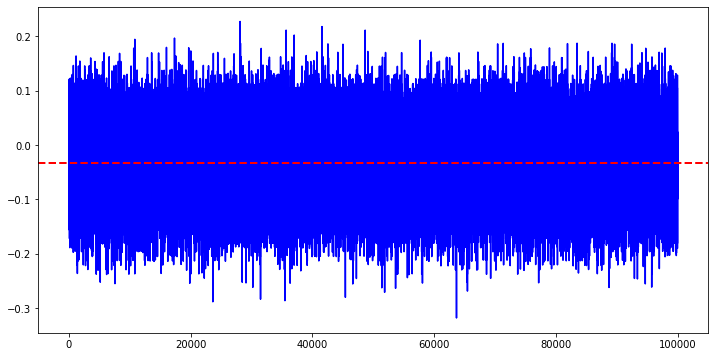

In [7]:
import matplotlib.pyplot as plt

# set plot size for good visibility
plt.figure(figsize=(12, 6))

dataframe["Z_GYRO (32 bit)"].plot(color="blue")

# plot mean line for z_gyro values and show plot
plt.axhline(y=mean_values[2], color="red", linewidth=2, linestyle="--")
plt.show()

Of course, it is also possible to use `matplotlib` directly. in the following cell a large number of normally 
distribute values are generated. These values are then displayed using a histogram.

[135.0171103618879, 100.62153991178285, 121.20223990270614, 103.45794256915403, 103.54990539616861, 86.84109913311886, 88.57783984913489, 126.05339188285518, 93.44690347839226, 153.19296920202814]


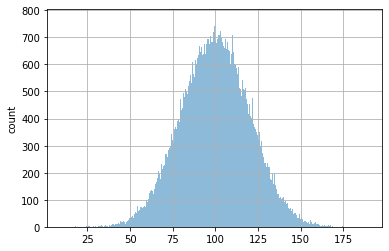

In [8]:
import random
import matplotlib.pyplot as plt

random_values = []
for _ in range(100000):
    random_values.append(random.gauss(mu=100, sigma=20))

print(random_values[:10])

plt.hist(random_values, bins=500, alpha=0.5)
plt.ylabel("count")
plt.grid(True)

# Self Test

### Question 1
`2.0 Pts`

Which of the following statements about tkinter are correct?

*Note: There are 3 correct answers to this question.*

tkinter is the only Python library to implement GUIs (graphical user interfaces).

tkinter is an interface to Tcl/Tk which enables the implementation of GUIs (graphical user interfaces) in other programming languages. `correct`

tkinter enables the creation of buttons, scrollbars, checkboxes, and so on. `correct`

tkinter offers the possibility to implement GUIs (graphical user interfaces).`correct`

tkinter is well suited to implement video games.